<a href="https://colab.research.google.com/github/Ka275578/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_third_commit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Name - NYC Taxi Trip Time Prediction</u></b>

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name** - Kumar Anand
##### **email** - ka275578@gmail.com 

# **Project Summary -**

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, we have to predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - contains 1458644 trip records and 11 Data fields.

### New York City is well known for traffic jams which happens due to roadworks, street closures or various other reason.
### Due to this high congestion on the roads it has become very much important to know the trip duration before starting any trip.
### In this project we will be developing various machine learning regression models which will predict the trip timing based on the given dataset.
### ML models used for this project and the respective hyperparametes used - 
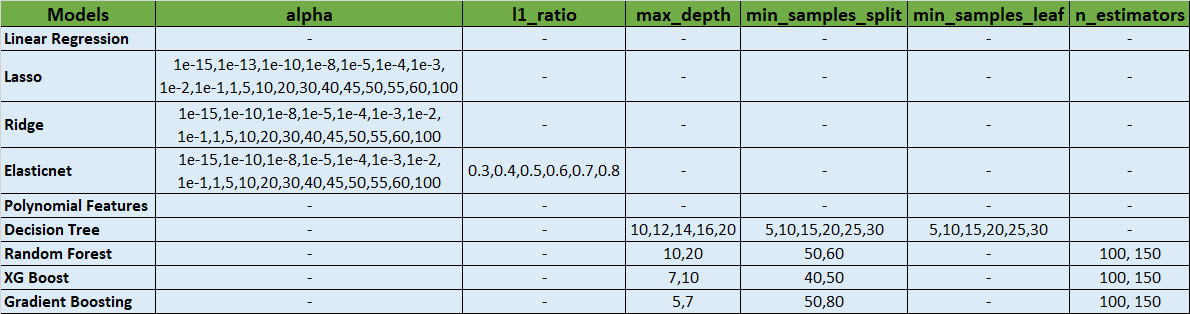
### Predictions made through these models will give the person taking ride a prior estimation of the trip timings so that he/she can plan their work accordingly.


### Following are the metrics we got for various ML models on the test set -
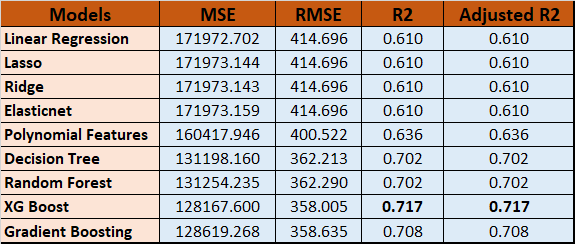
### Prediction made by XG Boost Regressor is best with R2 and adjusted R2 of 0.717.

# **GitHub Link -**

https://github.com/Ka275578/NYC-Taxi-Trip-Time-Prediction

# **Problem Statement**

* Now a days there is sudden increase in the popularity of app based taxi service providers like Uber, Curb, Lyft etc. in the NYC. So, it has become very much important for these companies to predict the ride timings more accurately before start of any trip.
* Knowing the trip duration beforehand will help the rider in planning their day accordingly.
* Also, for people taking taxis for going to office, knowing trip duration is very much important so that they can leave on proper time from their home.
* So, it has become extremely important to predict the trip duration accurately which depend on several parameters like trip distance, start time, pickup location, drop location etc.
* As trip duration depends on a lot of parameters, so the best way to predict the trip duration is with the help of some historical dataset (in this case NYC taxi dataset) by employing machine learning models.
* Our main goal is to build a model that predicts the total ride duration of taxi trips from New York City Taxi and Limousine Commission (TLC) dataset.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


# ***Let's Start !***

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from numpy import math

#from geopy.distance import geodesic
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

###Load dataset

In [5]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [6]:
nyc_taxi_dataset = pd.read_csv('/content/mydrive/MyDrive/NYC-Taxi-Trip-Time-Prediction_Kumar_Anand/NYC Taxi Data.csv')

### Dataset Rows & Columns count

### Dataset First View

In [7]:
#Let's have a look on dataset
nyc_taxi_dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [8]:
nyc_taxi_dataset.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [9]:
nyc_taxi_dataset.shape

(1458644, 11)

There are total 1458644 entries and 11 features in the dataset. Lets explore more to know the type of features.

### Dataset Information

In [10]:
#checking the info of dataset
nyc_taxi_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Checking duplicate Values

In [11]:
#Checking the unique values in the dataset
nyc_taxi_dataset.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

There are 1458644 unique entries in column 'id' which is same as number of rows in the dataset. So, there is no duplicate entries in the dataset.

#### Missing Values/Null Values

In [12]:
nyc_taxi_dataset.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

We can see that there is no null values in the dataset

### Initial insights on the dataset -

The dataset is based on the 2016 NYC Yellow Cab trip record.

####Following are the dependent and independent variables -
####Independent Variables - 
*id, 
vendor_id, 
pickup_datetime, 
dropoff_datetime, 
passenger_count, 
pickup_longitude, 
pickup_latitude, 
dropoff_longitude, 
dropoff_latitude, 
store_and_fwd_flag*

####Dependent / Target Variable -
trip_duration

Our goal is to predict the Target Varible trip_duration by employing various machine learning regression models.

This dataset doesn't have any duplicate or null values.

## ***Understanding Variables***

In [13]:
#to see column names
nyc_taxi_dataset.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

### Variables Description 

* id - a unique identifier for each trip
* vendor_id - a code indicating the provider associated with the trip record
* pickup_datetime - date and time when the meter was engaged
* dropoff_datetime - date and time when the meter was disengaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* trip_duration - duration of the trip in seconds

In [14]:
#to check data types of features
nyc_taxi_dataset.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

* id, pickup_datetime, dropoff_datetime, store_and_fwd_flag are of object dtype.
* vendor_id, passenger_count and trip_duration are of int dtype.
* pickup_longitude, pickup_lattitude, dropoff_longitude and dropoff_lattitude are of float dtype.

In [15]:
#Describing the dataset
nyc_taxi_dataset.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


From the above description we infer that - 

The min passenger_count in the dataset is 0 which is not possible so this might be the error in recording the data or the driver might have entered wrongly the number of passengers to increase the trip counts so, we will drop the readings where passenger count is 0. 

##***Data Wrangling, Data Visualization and Feature Engineering***

### **Univariate Analysis**

In [16]:
#Dropping the rows where passenger_count is 0.
nyc_taxi_dataset = nyc_taxi_dataset[nyc_taxi_dataset['passenger_count']!=0]
nyc_taxi_dataset.shape

(1458584, 11)

In the passenger_count the maximum entry is 9 which also doesn't seems correct. 

In [17]:
nyc_taxi_dataset['passenger_count'].value_counts().reset_index()

,index,passenger_count
0,1,1033540
1,2,210318
2,5,78088
3,3,59896
4,6,48333
5,4,28404
6,7,3
7,9,1
8,8,1


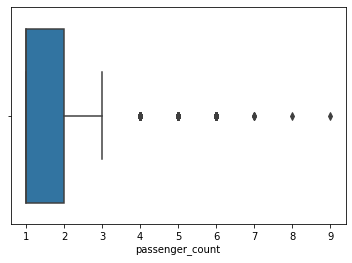

In [18]:
#Plotting boxplot for passenger_count to check the outliers.
sns.boxplot(nyc_taxi_dataset['passenger_count'])


In the column passenger_count for number of passengers 7, 8 & 9 there are only 3, 1 & 1 entries respectively which is very less compared to passenger_count for other trips. Also, in traditional taxi maximum of 6 passengers (if it is a SUV) are allowed So, we will drop these outliers.

In [19]:
#Dropping the rows where passenger_count more than 6.
nyc_taxi_dataset = nyc_taxi_dataset[nyc_taxi_dataset['passenger_count']<7]
nyc_taxi_dataset.shape

(1458579, 11)

In [20]:
nyc_taxi_dataset['passenger_count'].value_counts().reset_index()

,index,passenger_count
0,1,1033540
1,2,210318
2,5,78088
3,3,59896
4,6,48333
5,4,28404


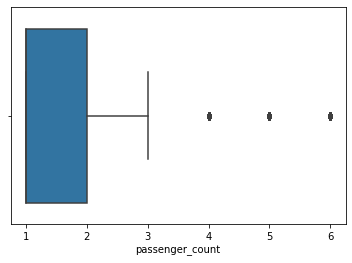

In [21]:
#Plotting boxplot again after removing the outliers for passenger count.
sns.boxplot(nyc_taxi_dataset['passenger_count'])

After dropping the passenger_count 7, 8 & 9 we are now only left with passenger count 4, 5 & 6 which are showing as outlier in the box plot but we will not be removing them as these values are possible values for passenger_count.

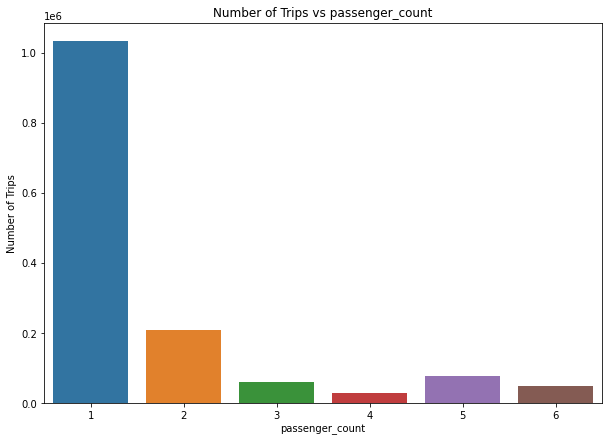

In [22]:
#Plotting Number of Trips vs passenger_count.
plt.figure(figsize=(10,7))
plt.title("Number of Trips vs passenger_count")
sns.countplot(x = 'passenger_count', data = nyc_taxi_dataset)
plt.xlabel("passenger_count")
plt.ylabel("Number of Trips")
plt.show()

countplot gives the better visualization for the observational counts in different category-based bins using bars.From the above graph we infer that most of the people prefer to go solo.

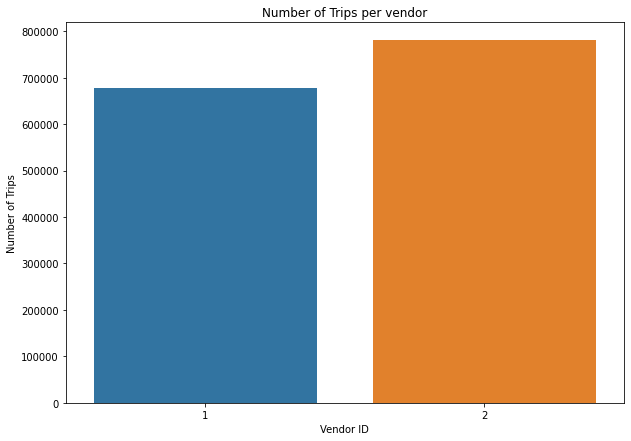

In [23]:
#Plotting countplot for vendor_id.
plt.figure(figsize=(10,7))
plt.title("Number of Trips per vendor")
sns.countplot(x = 'vendor_id', data = nyc_taxi_dataset)
plt.xlabel("Vendor ID")
plt.ylabel("Number of Trips")
plt.show()

countplot gives the better visualization of how the observational data is spread between vendor 1 & 2. Trips taken by the vendor 2 is more than vendor 1.

In [24]:
#convert datatype to datetime for pick-up and drop time
nyc_taxi_dataset['pickup_datetime'] = pd.to_datetime(nyc_taxi_dataset['pickup_datetime'])
nyc_taxi_dataset['dropoff_datetime'] = pd.to_datetime(nyc_taxi_dataset['dropoff_datetime'])

In [29]:
#Extracting day from given dates
nyc_taxi_dataset['pickup_day'] = nyc_taxi_dataset['pickup_datetime'].dt.day_name()
nyc_taxi_dataset['dropoff_day'] = nyc_taxi_dataset['dropoff_datetime'].dt.day_name()
nyc_taxi_dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday


Text(0, 0.5, 'count')

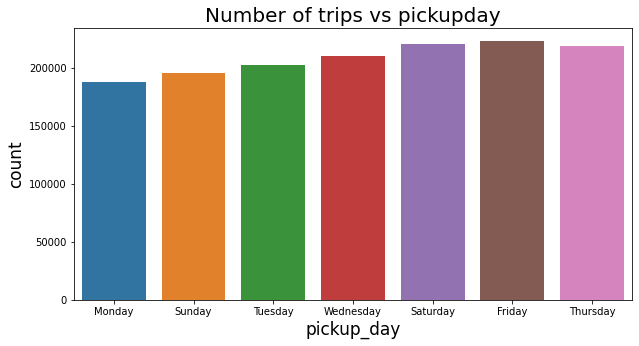

In [39]:
#sns.countplot(x= 'pickup_day',data=nyc_taxi_dataset, palette = "Set1")
plt.figure(figsize = (10,5))
ax=sns.countplot(x = "pickup_day", data = nyc_taxi_dataset)
ax.set_title("Number of trips vs pickupday", fontsize = 20)
plt.xlabel("pickup_day",fontsize=17)
plt.ylabel("count", fontsize=17)


Text(0, 0.5, 'count')

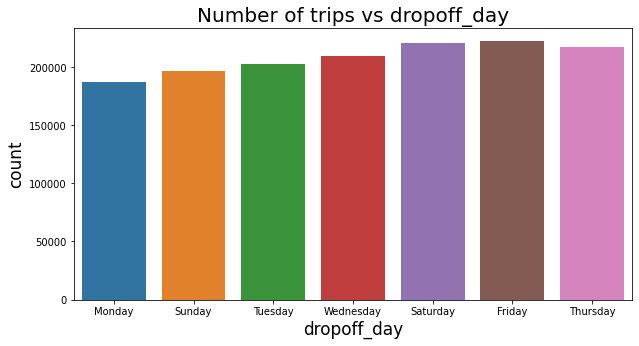

In [40]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x = "dropoff_day", data = nyc_taxi_dataset)
ax.set_title("Number of trips vs dropoff_day", fontsize = 20)
plt.xlabel("dropoff_day",fontsize=17)
plt.ylabel("count", fontsize=17)

Countplot gives a better visuallization for the spread of observational data between each week day for pickup and drop. From the above graph we can infer that most of the trips are done on Friday and Saturday. On weekends people prefer to go more on trips.

In [43]:
nyc_taxi_dataset['pickup_hour'] = nyc_taxi_dataset['pickup_datetime'].dt.hour
nyc_taxi_dataset['dropoff_hour'] = nyc_taxi_dataset['dropoff_datetime'].dt.hour
nyc_taxi_dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hour,dropoff_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,17,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,11,12
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,19,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,13,13


Text(0, 0.5, 'count')

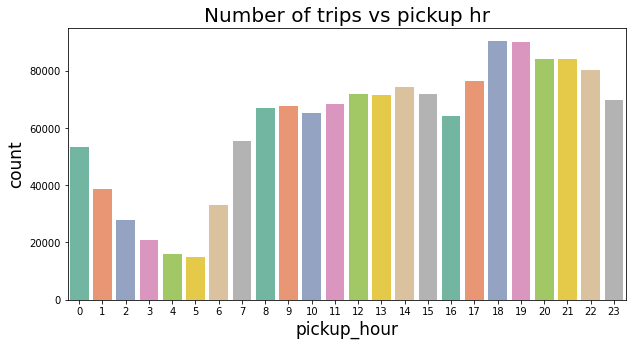

In [47]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x = "pickup_hour", data = nyc_taxi_dataset, palette='Set2')
ax.set_title("Number of trips vs pickup hr", fontsize = 20)
plt.xlabel("pickup_hour",fontsize=17)
plt.ylabel("count", fontsize=17)

Text(0, 0.5, 'count')

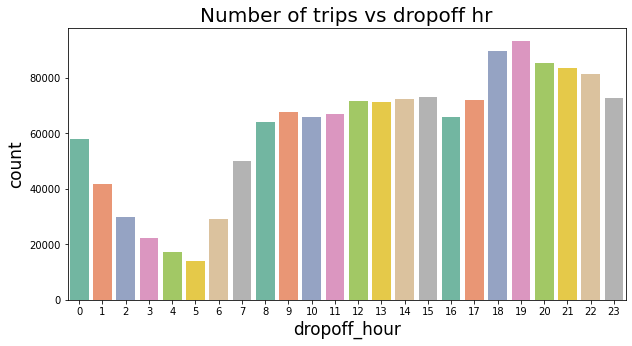

In [48]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x = "dropoff_hour", data = nyc_taxi_dataset, palette='Set2')
ax.set_title("Number of trips vs dropoff hr", fontsize = 20)
plt.xlabel("dropoff_hour",fontsize=17)
plt.ylabel("count", fontsize=17)

The above graph shows that most of the trips are done between 6:00 PM to 7:00 PM, reason might be this is the time when people will leave from offices and they are taking cab on their way back home or on Friday since we saw is the busiest day we can infer that most of the people are going for trips after office on Friday.